### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### 1- indepths Analysis of David Warner (Australian Batsman) Performance

In [4]:
filter = (df['batsman'] == 'DA Warner')
df_warner = df[filter]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


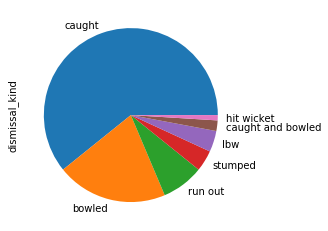

In [5]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [6]:
len(df_warner[df_warner['batsman_runs'] == 4])

401

In [7]:
len(df_warner[df_warner['batsman_runs'] == 6])

160

In [8]:
def count(df,runs):
    return len(df_warner[df_warner['batsman_runs'] == runs])*runs

In [9]:
count(df_warner,1)

997

In [10]:
count(df_warner,2)

414

In [11]:
count(df_warner,3)

39

In [12]:
count(df_warner,4)

1604

In [13]:
count(df_warner,6)

960

([<matplotlib.patches.Wedge at 0x2b353a53e88>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8038429148449225, -0.750890516822272, '6')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8%'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3%'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0%'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0%'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9%')])

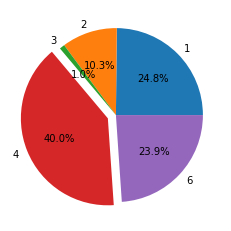

In [14]:
slices = [997,414,39,1604,960]
labels = [1,2,3,4,6]
explode = [0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)

### 2- Score Distribution for Teams by Innings

In [15]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [16]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
    'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
    'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
    'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
    'Rising Pune Supergiants':'RPS'
}

In [17]:
df['batting_team'] = df['batting_team'].map(Teams)
df['bowling_team'] = df['bowling_team'].map(Teams)

In [18]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [19]:
runs = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1279,2,KKR,140
1280,1,GL,162
1281,2,SRH,163
1282,1,SRH,208


In [20]:
inning1 = runs[runs['inning'] == 1]
inning2 = runs[runs['inning'] == 2]

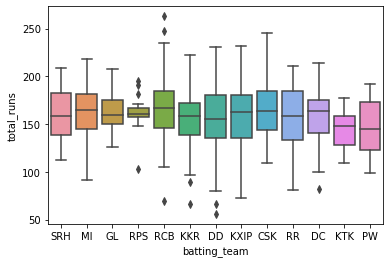

In [21]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

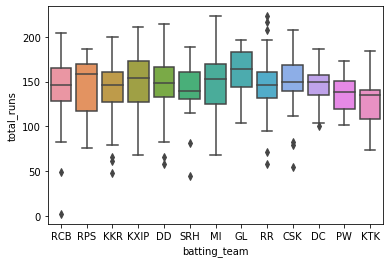

In [22]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

### 3- How many times teams scores more than 200?

In [23]:
high_scores = df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [24]:
score_200 = high_scores[high_scores['total_runs'] > 200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1170,580,1,RCB,SRH,227
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211


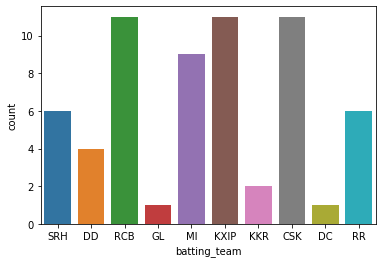

In [35]:
sns.countplot(score_200['batting_team'])

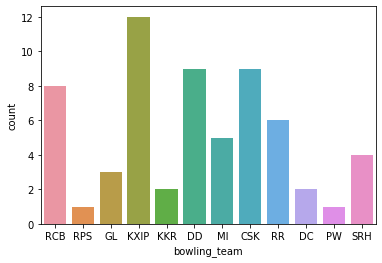

In [25]:
sns.countplot(score_200['bowling_team'])

### 4- Batsman Comparaison

In [30]:
balls = df.groupby(['batsman'])['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [31]:
runs = df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [32]:
four = df[df['batsman_runs'] == 4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [33]:
runs_4 = four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns = ['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [34]:
six = df[df['batsman_runs'] == 6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [35]:
runs_6 = six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns = ['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [36]:
player = pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,NaN
457,Yashpal Singh,47,67,NaN,NaN
458,Younis Khan,3,7,NaN,NaN
459,Yuvraj Singh,2591,2050,NaN,NaN


In [37]:
player.fillna(0,inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0
457,Yashpal Singh,47,67,0.0,0.0
458,Younis Khan,3,7,0.0,0.0
459,Yuvraj Singh,2591,2050,0.0,0.0


In [41]:
player['strike_rate'] = player['batsman_runs'] / player['ball']
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,1.428571
1,A Chandila,4,7,7.0,1.0,0.571429
2,A Chopra,53,75,1.0,2.0,0.706667
3,A Choudhary,25,20,5.0,5.0,1.250000
4,A Flintoff,62,57,3.0,1.0,1.087719
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,1.049180
457,Yashpal Singh,47,67,0.0,0.0,0.701493
458,Younis Khan,3,7,0.0,0.0,0.428571
459,Yuvraj Singh,2591,2050,0.0,0.0,1.263902


In [42]:
grp = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [43]:
max = grp.groupby('batsman')['batsman_runs'].max().reset_index()
max.columns = ['batsman','max_runs']
max

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [44]:
player2 = pd.concat([player,max.iloc[:,1]],axis=1)
player2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,1.428571,36
1,A Chandila,4,7,7.0,1.0,0.571429,4
2,A Chopra,53,75,1.0,2.0,0.706667,24
3,A Choudhary,25,20,5.0,5.0,1.250000,15
4,A Flintoff,62,57,3.0,1.0,1.087719,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,1.049180,45
457,Yashpal Singh,47,67,0.0,0.0,0.701493,20
458,Younis Khan,3,7,0.0,0.0,0.428571,3
459,Yuvraj Singh,2591,2050,0.0,0.0,1.263902,83


### 5- Top 10 Batsman

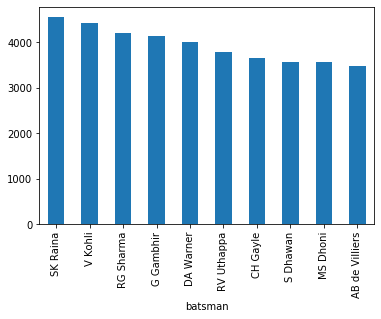

In [45]:
max_runs = df.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot.bar()

### 6- Top Individuals Score Batsman

In [46]:
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


### 7- Highest Wicket Taker

In [47]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [48]:
dismissal_kind = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

In [49]:
hwt = df[df['dismissal_kind'].isin(dismissal_kind)]
hwt

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,RCB,SRH,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,RCB,SRH,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,RCB,SRH,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,RCB,SRH,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


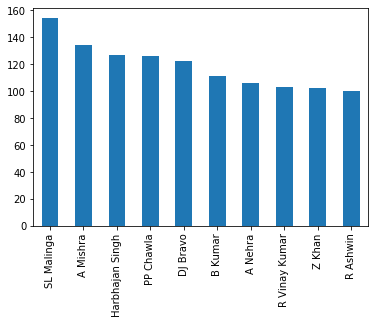

In [50]:
hwt['bowler'].value_counts()[:10].plot(kind='bar')